># **<span style="color:#ef233c">Time Series Analysis Of FNIRS</span>**
>- ***<span style="color:#13315c"> Gokul Agrawal | CL24M004<span>*** 
>- ***<span style="color:#13315c"> Shreenandan Sahu | CL24M013<span>***
>- ***<span style="color:#13315c"> K S Suraksha Jain | CL24M015<span>***


>### **<span style="color:#ef233c">Time Domain Analysis</span>**


 **<span style="color:teal">Defination**: A time series is a series of data points recorded at different time-intervals. The time series analysis means analyzing the time series data using various statistical tools and techniques.

*<span style="color:#9e0059">In This notebook we will focus on doing the Time Domain Analysis which is simply the statistical analysis. We have tried to do the following analysis.*


- **<span style="color:#e09f3e">Mean**: Measures the average value over time.
- **<span style="color:#e09f3e">Median**: The central value when data points are ordered, useful for skewed distributions.
- **<span style="color:#e09f3e">Maximum and Minimum Values**: Identifies the highest and lowest data points.
- **<span style="color:#e09f3e">Range**: Difference between the maximum and minimum values.
- **<span style="color:#e09f3e">Variance**: Measures the spread of data around the mean.
- **<span style="color:#e09f3e">Standard Deviation**: Square root of variance, showing the average deviation from the mean.
- **<span style="color:#e09f3e">Skewness**: Measures the asymmetry of the data distribution.
- **<span style="color:#e09f3e">Kurtosis**: Measures the "tailedness" or peakedness of the data distribution.



*<span style="color:#9e0059">In this notebook we have tried analysing the data using python inbuilt functions and we have also developed our own code to compute the same statistical parameter and compared them. Every block of code has an explanation markdown.*



> ### **<span style="color:#ff0054">ABOUT DATA SET**
We have used FNIRS data recorded for ***<span style="Color:#e09f3e">Frontotemporal activation differs between perception of simulated cochlear implant speech and speech in background noise: An image-based fNIRS study*** available at https://data.mendeley.com/datasets/4cjgvyg5p2/1 for the paper https://pmc.ncbi.nlm.nih.gov/articles/PMC8503862/#ABS1 .

Sampled at a ***Sampling Rate of 25 Hz*** the database has collection of data from 28 channels covering the frontotemporal region of the head. The data was recorded for around ***35 minutes***.

For the analysis purpose we have choosen the CH7.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *

#umber of datapoints of the given data used
row_num=10000 

#choosing the desired columns from the 29 columns 28 channels and 1 time column
#loading the data to dataframe of pandas
df=pd.read_csv("DataSet.csv",usecols=["Time","CH7"],nrows=row_num)

#coverting the dataframe to 2D array in python to ease working on it. 
data_main=df.to_numpy()

#print(data_main[:,0]) : is used to represent all values
#print(data_main[0][0]) row,column configuration.


#### <span style="color:#ff0054"> **Ploting The Raw Data**

Using the matplotlib library we will plot the graph of the raw data

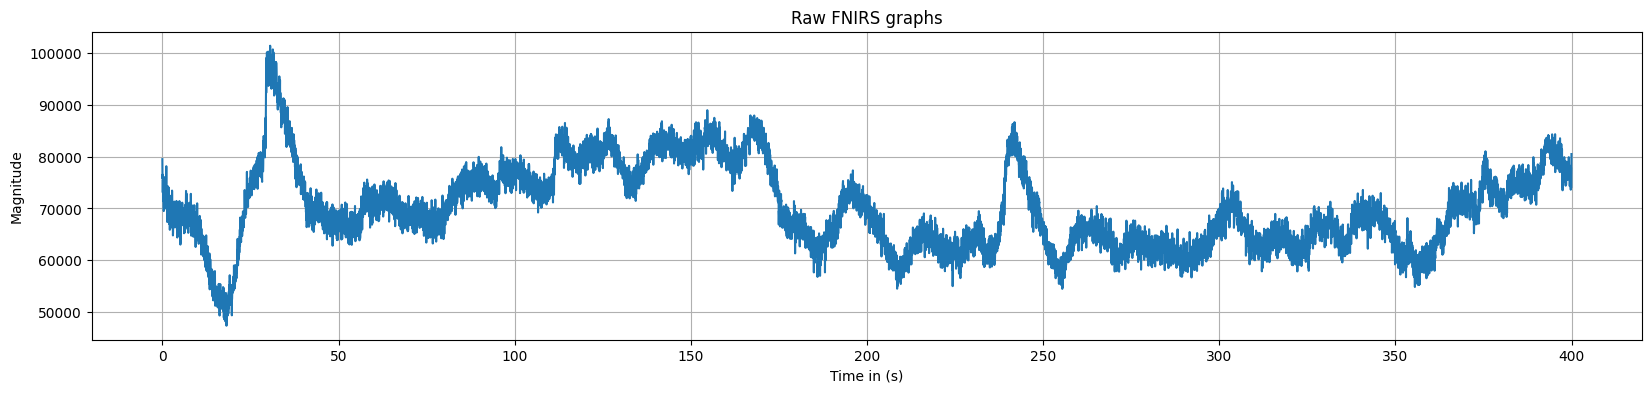

In [2]:
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1])
plt.title("Raw FNIRS graphs")
plt.xlabel("Time in (s)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

#### <span style="color:#ff0054"> **Moving Average Filtering**

We will filter the high frequency noise component using moving average filter averaging over n samples. The following code is a function for moving average filter.

In [3]:
def moving_average(data, window):
    num_row = data.size  # Get the total number of elements
    flt_data = np.full(num_row, data.mean())  # Initialize the output array with the mean value of data

    for j in range(window - 1, num_row):
        k = j - (window - 1)
        flt_data[j] = data[k:j + 1].sum() / window  # Calculate the moving average

    return flt_data


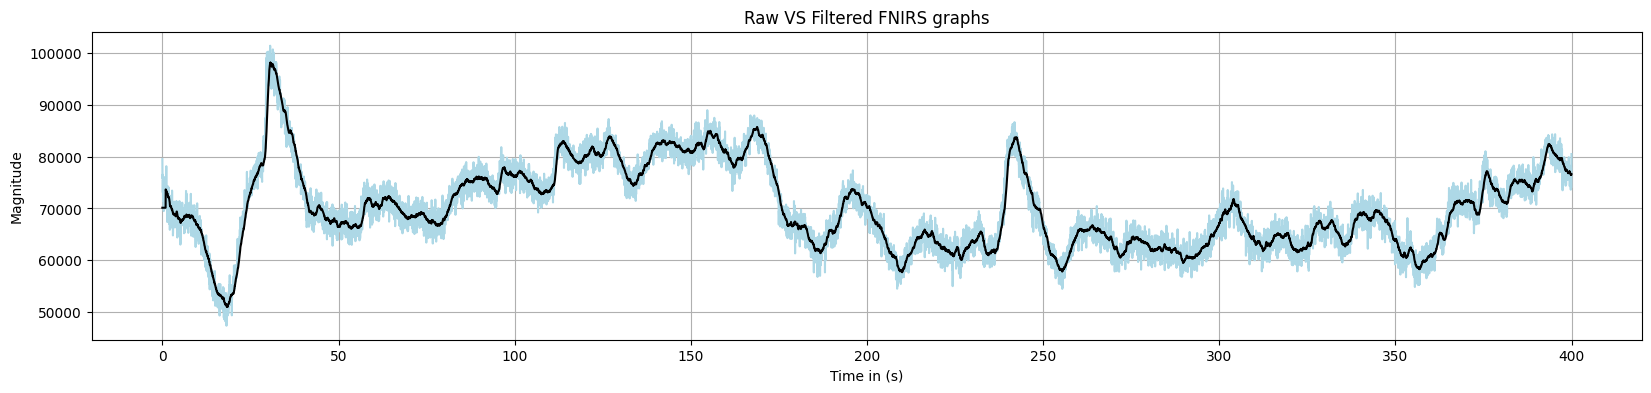

In [4]:
filtered_data=moving_average(data_main[:,1],25)
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1], color='lightblue')
plt.plot(data_main[:,0],filtered_data, color='black')
plt.title("Raw VS Filtered FNIRS graphs")
plt.xlabel("Time in (s)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

- **<span style="color:#e09f3e">Mean**: Measures the average value over time.

In [5]:
average=data_main[:,1].sum()/row_num
print(f"Average: {average}")

Average: 70141.650527773


- **<span style="color:#e09f3e">Median**: The central value when data points are ordered, useful for skewed distributions.

In [6]:
sort_data=np.sort(data_main[:,1]) #arranging the series in order
median=(sort_data[row_num//2]+sort_data[(row_num+1)//2])/2  #taking the average of the 2 mid values
print(f"Median: {median}")


Median: 68784.48076


- **<span style="color:#e09f3e">Maximum and Minimum Values**: Identifies the highest and lowest data points.

In [7]:
max_value=data_main[:,1].max()
min_value=data_main[:,1].min()
print(f"Maximum Value: {max_value}")
print(f"Minimum Value: {min_value}")

Maximum Value: 101462.9773
Minimum Value: 47335.32838


- **<span style="color:#e09f3e">Range**: Difference between the maximum and minimum values.

In [8]:
range=max_value-min_value
print(f"Range: {range}")

Range: 54127.64892


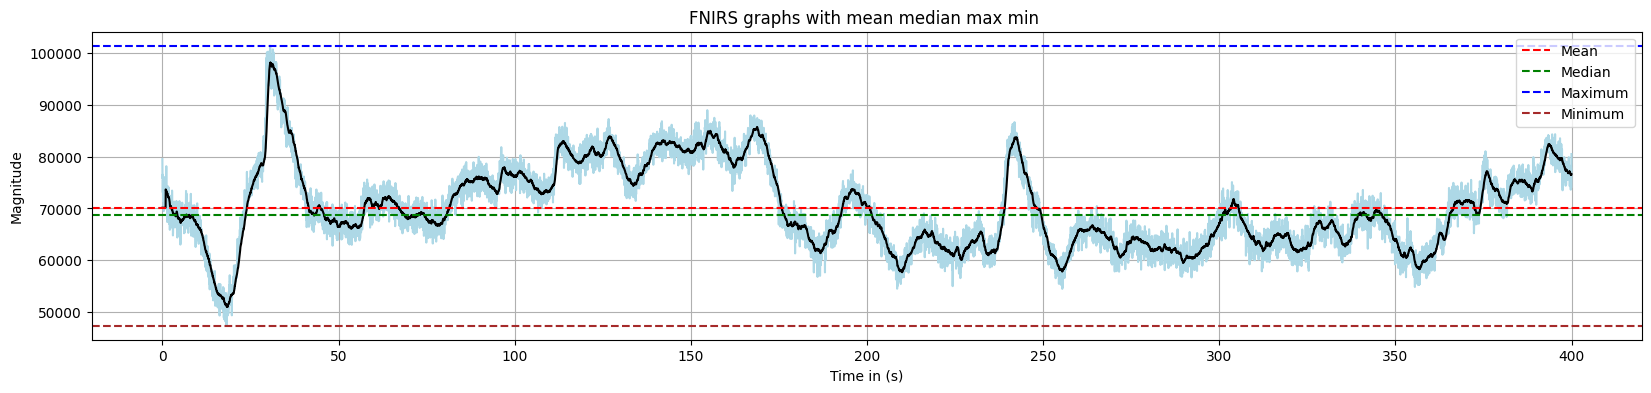

In [9]:
plt.figure(figsize=(20,4))
plt.plot(data_main[:,0],data_main[:,1], color='lightblue')
plt.plot(data_main[:,0],filtered_data, color='black')
plt.axhline(y=average,linestyle='dashed', color='red',label='Mean') #to draw horizontal fixed line
plt.axhline(y=median,linestyle='dashed', color='green',label='Median')
plt.axhline(y=max_value,linestyle='dashed', color='blue',label='Maximum')
plt.axhline(y=min_value,linestyle='dashed', color='brown',label='Minimum')
plt.title("FNIRS graphs with mean median max min ")
plt.xlabel("Time in (s)")
plt.ylabel("Magnitude")
plt.legend(loc='upper right')
plt.grid()
plt.show()

- **<span style="color:#e09f3e">Variance**: Measures the spread of data around the mean.

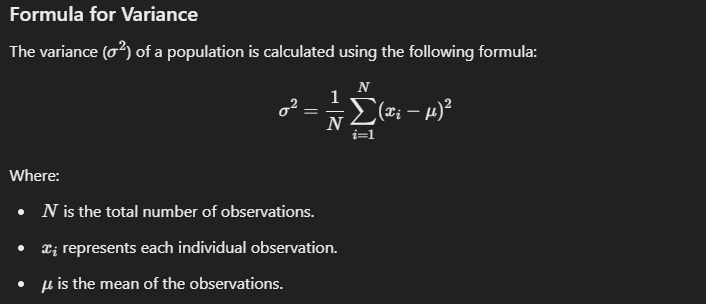

In [10]:
variance=0
for i in data_main[:,1]:
    variance+=(i-average)**2
variance/=row_num

print(f"variance by formula: {variance}")
print(f"variance by function: {data_main[:,1].var()}")

variance by formula: 65077822.81571169
variance by function: 65077822.81571148


- **<span style="color:#e09f3e">Standard Deviation**: Square root of variance, showing the average deviation from the mean.

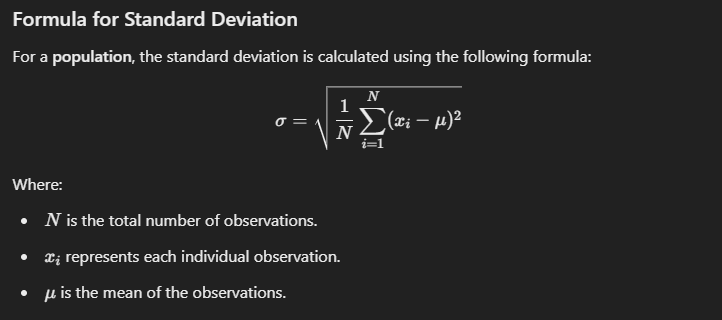

In [11]:
standard_deviation=0
standard_deviation=np.sqrt(variance)
print(f"Standard Deviation by formula: {standard_deviation}")
print(f"Standard Deviation by function: {data_main[:,1].std()}")

Standard Deviation by formula: 8067.082670687818
Standard Deviation by function: 8067.082670687804


- **<span style="color:#e09f3e">Skewness**: Measures the asymmetry of the data distribution.

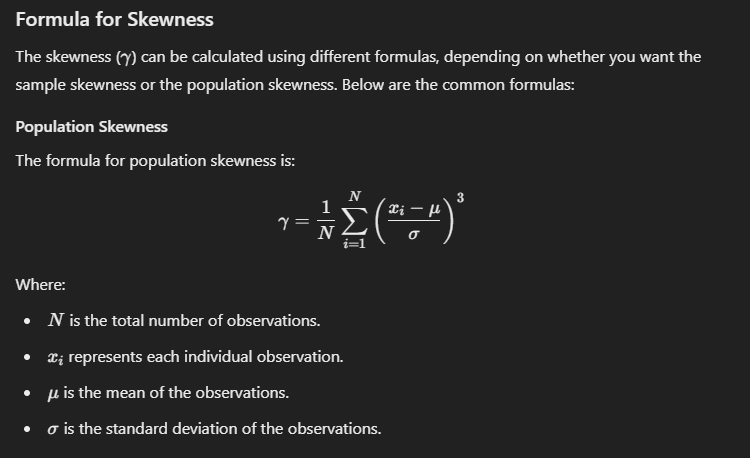

Interpretation of Skewness Values

**Positive Skewness:** Indicates that the right tail (higher values) is longer or fatter than the left tail. The mean is greater than the median.

**Negative Skewness:** Indicates that the left tail (lower values) is longer or fatter than the right tail. The mean is less than the median.

**Zero Skewness:** Indicates a symmetric distribution, where the mean and median are approximately equal.

In [12]:
skewness=0
for i in data_main[:,1]:
    skewness+=((i-average)/standard_deviation)**3
skewness = skewness / (row_num)

type=""

if(skewness<=0):
    if(skewness==0):
        type="Symmetric Distribution ie. mean is equal to median"
    else:
        type="Left Skewed ie. mean less than median"
else:
    type="Right Skewed ie. mean more than median"


print(f"Skewness by formula: {skewness} and type is: {type}")
print(f"Skewness by function: {skew(data_main[:,1])}")
print(f"Mean: {average} and Median: {median}")

Skewness by formula: 0.46980587776681293 and type is: Right Skewed ie. mean more than median
Skewness by function: 0.46980587776681654
Mean: 70141.650527773 and Median: 68784.48076


- **<span style="color:#e09f3e">kurto**: Measures the "tailedness" or peakedness of the data distribution.

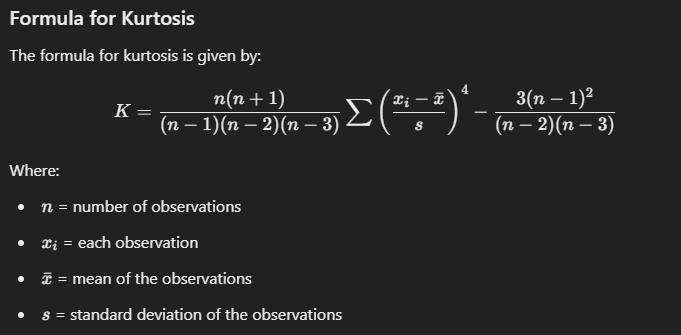

Types of kurto

***Leptokurtic (kurto > 3):*** Distributions that have heavier tails and a sharper peak than a normal distribution.
***Platykurtic (kurto < 3):*** Distributions that have lighter tails and a flatter peak than a normal distribution.
***Mesokurtic (Kurtosis = 3):*** Distributions that have tails and a peak similar to a normal distribution.

In [17]:
kurto=0
for i in data_main[:,1]:
    kurto+=((i-average)/standard_deviation)**4
kurto = (kurto*(((row_num)*(row_num+1))/((row_num-1)*(row_num-2)*(row_num-3))))-((3*(row_num-1)**2)/((row_num-2)*(row_num-3)))

type=""

if(kurto<=3):
    if(kurto==3):
        type="peak similar to a normal"
    else:
        type="flatter peak than a normal"
else:
    type="sharper peak than a normal"


print(f"Kurtosis by formula: {kurto} and type is: {type}")
print(f"Kurtosis by function: {kurtosis(data_main[:,1], fisher=True)}")

Kurtosis by formula: -0.026337702762992965 and type is: flatter peak than a normal
Kurtosis by function: -0.02751906113518432


#### **Ploting Histogram**
To visualize the skewness we will plot the histogram of the time series data.

Our approach to plot the histogram is as follow

- Defining the range of values the Random Variable can take
- Defining the intervals depending upon the range
- Sorting the data in ascending order
- Finding the number of times variable falls in each interval
- plot the number of each interval against the interval itself




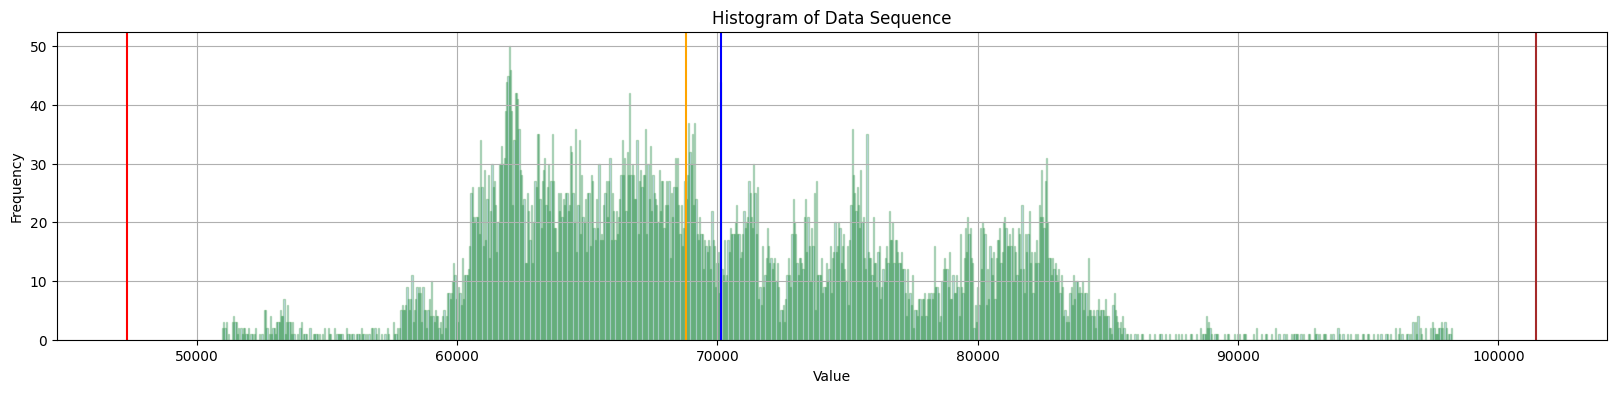

In [57]:
plt.figure(figsize=(20, 4))
plt.hist(filtered_data, bins=1000,edgecolor='green', alpha=0.25)  # You can adjust bins
plt.axvline(x=max_value, color='brown', linestyle='solid')
plt.axvline(x=min_value, color='red', linestyle='solid')
plt.axvline(x=median, color='orange', linestyle='solid')
plt.axvline(x=average, color='blue', linestyle='solid')
plt.title('Histogram of Data Sequence')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()